In [2]:
#Imports
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats


In [3]:
from scipy.stats import linregress

In [4]:
asthmaERLoc='../Datasets/rawAsthmaERChildren.csv'
aqiLoc='../Datasets/aqi.csv'

asthmaERDf = pd.read_csv(asthmaERLoc, header=[0,1])
aqiDf=pd.read_csv(aqiLoc)

In [5]:
asthmaERDf.head()


Year      2010                                            2011  \
    County ER Visits ER Visit Rate Standard ER Visit Ratio ER Visits   
0  Baldwin        92           984               Expected        101   
1   Barrow       168         853.7                    Low        154   
2   Bartow       176         656.8                    Low        183   
3     Bibb       396         987.5               Expected        411   
4  Bulloch       182      1,254.70                   High        196   

                                             2012                \
  ER Visit Rate Standard ER Visit Ratio ER Visits ER Visit Rate   
0      1,104.10               Expected        132      1,428.10   
1         791.6                    Low        170         884.2   
2           697                    Low        218           836   
3      1,022.70               Expected        389           977   
4      1,344.20                   High        187      1,282.50   

                                    ...                              2015  \
  Standard ER Visit Ratio           ...           Standard ER Visit Ratio   
0                   High            ...                         Expected    
1                    Low            ...                         Expected    
2                    Low            ...                              Low    
3                    Low            ...                         Expected    
4               Expected            ...                             High    

       2016                                            2017                \
  ER Visits ER Visit Rate Standard ER Visit Ratio ER Visits ER Visit Rate   
0        93      1,051.90               Expected         80         922.3   
1       185         907.3               Expected        196         941.9   
2       202         793.7                    Low        158         616.4   
3       567      1,487.70                   High        622      1,646.40   
4       199      1,351.00                   High        150         986.8   

                          Selected Years Total                \
  Standard ER Visit Ratio            ER Visits ER Visit Rate   
0               Expected                   821      1,134.70   
1               Expected                 1,385         870.4   
2                    Low                 1,527         738.1   
3                   High                 3,496      1,118.50   
4               Expected                 1,482      1,262.10   

                           
  Standard ER Visit Ratio  
0                   High   
1                    Low   
2                    Low   
3                   High   
4                   High   

[5 rows x 28 columns]

In [6]:
#access double row header
asthmaERDf['2010','ER Visit Rate'].head()

0         984
1       853.7
2       656.8
3       987.5
4    1,254.70
Name: (2010, ER Visit Rate), dtype: object

In [7]:
aqiGADf=aqiDf[(aqiDf['State']=='Georgia')]

In [8]:
aqiGADf.head(2)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
185,Georgia,Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
186,Georgia,Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0


In [9]:
len(aqiGADf.County.unique())

32

In [10]:
aqiGADf['County'].head()

185         Bibb
186     Charlton
187      Chatham
188    Chattooga
189       Clarke
Name: County, dtype: object

In [11]:
aqiGADf.columns.str.contains('ozone', case=False)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [12]:
aqiGADf.columns[aqiGADf.columns.str.contains('ozone', case=False)]

Index(['Days Ozone'], dtype='object')

In [13]:
aqiGADf['Days Ozone'].head()

185    163
186      0
187    100
188    240
189    188
Name: Days Ozone, dtype: int64

In [14]:
aqiGADf.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [15]:
aqiGADf.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
185,Georgia,Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
186,Georgia,Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0
187,Georgia,Chatham,2017,365,289,76,0,0,0,0,84,57,38,0,0,100,35,230,0
188,Georgia,Chattooga,2017,240,232,8,0,0,0,0,64,45,36,0,0,240,0,0,0
189,Georgia,Clarke,2017,360,314,46,0,0,0,0,97,53,38,0,0,188,0,172,0


In [16]:
aqiGADf=aqiGADf.drop(columns='State')
aqiGADf=aqiGADf.set_index('County')

In [17]:
aqiGADf.head()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
County,,,,,,,,,,,,,,,,,
Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0
Chatham,2017,365,289,76,0,0,0,0,84,57,38,0,0,100,35,230,0
Chattooga,2017,240,232,8,0,0,0,0,64,45,36,0,0,240,0,0,0
Clarke,2017,360,314,46,0,0,0,0,97,53,38,0,0,188,0,172,0


In [18]:
#aqiGADf['Year']=aqiGADf[str('Year')]

In [19]:
aqiGADfPivot=aqiGADf.pivot(columns='Year')

In [20]:
aqiGADfPivot.head()

Days with AQI                                                   \
Year               2010   2011   2012   2013   2014   2015   2016   2017   
County                                                                     
Bibb              364.0  364.0  366.0  365.0  365.0  365.0  366.0  365.0   
Charlton          119.0  115.0  116.0  117.0  116.0  119.0  117.0   47.0   
Chatham           365.0  365.0  366.0  365.0  365.0  365.0  366.0  365.0   
Chattooga         264.0  256.0  265.0  244.0  245.0  191.0  242.0  240.0   
Clarke            365.0  365.0  366.0  365.0  356.0  358.0  362.0  360.0   

          Good Days        ...  Days PM2.5        Days PM10                   \
Year           2010   2011 ...        2016   2017      2010  2011  2012 2013   
County                     ...                                                 
Bibb          160.0  174.0 ...       219.0  202.0       1.0   0.0   0.0  0.0   
Charlton      107.0   93.0 ...       117.0   47.0       0.0   0.0   0.0  0.0   
Chatham       183.0  176.0 ...       191.0  230.0       0.0   0.0   0.0  0.0   
Chattooga     203.0  202.0 ...         0.0    0.0      22.0  19.0  20.0  0.0   
Clarke        205.0  212.0 ...       171.0  172.0       0.0   0.0   0.0  0.0   

                               
Year      2014 2015 2016 2017  
County                         
Bibb       0.0  0.0  0.0  0.0  
Charlton   0.0  0.0  0.0  0.0  
Chatham    0.0  0.0  0.0  0.0  
Chattooga  0.0  0.0  0.0  0.0  
Clarke     0.0  0.0  0.0  0.0  

[5 rows x 128 columns]

In [21]:
#aqiGADfPivot.columns = aqiGADfPivot.columns.astype(str)
#aqiGADfPivot.columns = aqiGADfPivot.columns.map(str)

In [22]:
#aqiGADfPivot.columns=['_'.join(col) for col in aqiGADfPivot.columns]

In [23]:
aqiGADfPivot.columns


MultiIndex(levels=[['Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4

In [24]:
ozonePM10AndDaysGAAll= aqiGADfPivot[['Days with AQI','Days Ozone','Days PM10']]

In [25]:
ozonePM10AndDaysGAAll.head()

Days with AQI                                                   \
Year               2010   2011   2012   2013   2014   2015   2016   2017   
County                                                                     
Bibb              364.0  364.0  366.0  365.0  365.0  365.0  366.0  365.0   
Charlton          119.0  115.0  116.0  117.0  116.0  119.0  117.0   47.0   
Chatham           365.0  365.0  366.0  365.0  365.0  365.0  366.0  365.0   
Chattooga         264.0  256.0  265.0  244.0  245.0  191.0  242.0  240.0   
Clarke            365.0  365.0  366.0  365.0  356.0  358.0  362.0  360.0   

          Days Ozone        ...                Days PM10                   \
Year            2010   2011 ...    2016   2017      2010  2011  2012 2013   
County                      ...                                             
Bibb            73.0  101.0 ...   146.0  163.0       1.0   0.0   0.0  0.0   
Charlton         0.0    0.0 ...     0.0    0.0       0.0   0.0   0.0  0.0   
Chatham         91.0   75.0 ...   135.0  100.0       0.0   0.0   0.0  0.0   
Chattooga      242.0  237.0 ...   242.0  240.0      22.0  19.0  20.0  0.0   
Clarke         137.0  160.0 ...   191.0  188.0       0.0   0.0   0.0  0.0   

                               
Year      2014 2015 2016 2017  
County                         
Bibb       0.0  0.0  0.0  0.0  
Charlton   0.0  0.0  0.0  0.0  
Chatham    0.0  0.0  0.0  0.0  
Chattooga  0.0  0.0  0.0  0.0  
Clarke     0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

In [26]:
ozonePM10AndDaysGAAll.columns = ['_'.join(tuple(map(str, t))) for t in ozonePM10AndDaysGAAll.columns.values]

In [27]:
ozonePM10AndDaysGAAll=ozonePM10AndDaysGAAll.reset_index()

In [28]:
ozonePM10AndDaysGAAll['County']

0           Bibb
1       Charlton
2        Chatham
3      Chattooga
4         Clarke
5        Clayton
6           Cobb
7         Coffee
8       Columbia
9         Coweta
10        Dawson
11        DeKalb
12     Dougherty
13       Douglas
14         Floyd
15        Fulton
16         Glynn
17      Gwinnett
18          Hall
19         Henry
20       Houston
21       Lowndes
22        Murray
23      Muscogee
24      Paulding
25          Pike
26      Richmond
27      Rockdale
28        Sumter
29        Walker
30    Washington
31     Wilkinson
Name: County, dtype: object

In [29]:
asthmaERDf.head()

Year      2010                                            2011  \
    County ER Visits ER Visit Rate Standard ER Visit Ratio ER Visits   
0  Baldwin        92           984               Expected        101   
1   Barrow       168         853.7                    Low        154   
2   Bartow       176         656.8                    Low        183   
3     Bibb       396         987.5               Expected        411   
4  Bulloch       182      1,254.70                   High        196   

                                             2012                \
  ER Visit Rate Standard ER Visit Ratio ER Visits ER Visit Rate   
0      1,104.10               Expected        132      1,428.10   
1         791.6                    Low        170         884.2   
2           697                    Low        218           836   
3      1,022.70               Expected        389           977   
4      1,344.20                   High        187      1,282.50   

                                    ...                              2015  \
  Standard ER Visit Ratio           ...           Standard ER Visit Ratio   
0                   High            ...                         Expected    
1                    Low            ...                         Expected    
2                    Low            ...                              Low    
3                    Low            ...                         Expected    
4               Expected            ...                             High    

       2016                                            2017                \
  ER Visits ER Visit Rate Standard ER Visit Ratio ER Visits ER Visit Rate   
0        93      1,051.90               Expected         80         922.3   
1       185         907.3               Expected        196         941.9   
2       202         793.7                    Low        158         616.4   
3       567      1,487.70                   High        622      1,646.40   
4       199      1,351.00                   High        150         986.8   

                          Selected Years Total                \
  Standard ER Visit Ratio            ER Visits ER Visit Rate   
0               Expected                   821      1,134.70   
1               Expected                 1,385         870.4   
2                    Low                 1,527         738.1   
3                   High                 3,496      1,118.50   
4               Expected                 1,482      1,262.10   

                           
  Standard ER Visit Ratio  
0                   High   
1                    Low   
2                    Low   
3                   High   
4                   High   

[5 rows x 28 columns]

In [30]:
asthmaERDf.columns=['_'.join(col) for col in asthmaERDf.columns]

In [31]:
asthmaERDf.head()

,Year_County,2010_ER Visits,2010_ER Visit Rate,2010_Standard ER Visit Ratio,2011_ER Visits,2011_ER Visit Rate,2011_Standard ER Visit Ratio,2012_ER Visits,2012_ER Visit Rate,2012_Standard ER Visit Ratio,...,2015_Standard ER Visit Ratio,2016_ER Visits,2016_ER Visit Rate,2016_Standard ER Visit Ratio,2017_ER Visits,2017_ER Visit Rate,2017_Standard ER Visit Ratio,Selected Years Total_ER Visits,Selected Years Total_ER Visit Rate,Selected Years Total_Standard ER Visit Ratio
0,Baldwin,92,984,Expected,101,"1,104.10",Expected,132,"1,428.10",High,...,Expected,93,"1,051.90",Expected,80,922.3,Expected,821,"1,134.70",High
1,Barrow,168,853.7,Low,154,791.6,Low,170,884.2,Low,...,Expected,185,907.3,Expected,196,941.9,Expected,"1,385",870.4,Low
2,Bartow,176,656.8,Low,183,697,Low,218,836,Low,...,Low,202,793.7,Low,158,616.4,Low,"1,527",738.1,Low
3,Bibb,396,987.5,Expected,411,"1,022.70",Expected,389,977,Low,...,Expected,567,"1,487.70",High,622,"1,646.40",High,"3,496","1,118.50",High
4,Bulloch,182,"1,254.70",High,196,"1,344.20",High,187,"1,282.50",Expected,...,High,199,"1,351.00",High,150,986.8,Expected,"1,482","1,262.10",High


In [32]:
for year in np.arange(2010,2018):
    asthmaERDf[f'{year}_ER Visit Rate']=asthmaERDf[f'{year}_ER Visit Rate'].str.replace(',','')
    asthmaERDf[f'{year}_ER Visit Rate']=asthmaERDf[f'{year}_ER Visit Rate'].str.replace('*','')
    asthmaERDf[f'{year}_ER Visit Rate']=pd.to_numeric(asthmaERDf[f'{year}_ER Visit Rate'], errors='coerce')
    

In [33]:
#  asthmaERDf['2017_ER Visits']=asthmaERDf['2017_ER Visits'].str.replace(',','')
#  asthmaERDf['2017_ER Visits']=pd.to_numeric(asthmaERDf['2017_ER Visits'])

In [34]:
asthmaERDf.dtypes

Year_County                                      object
2010_ER Visits                                   object
2010_ER Visit Rate                              float64
2010_Standard ER Visit Ratio                     object
2011_ER Visits                                   object
2011_ER Visit Rate                              float64
2011_Standard ER Visit Ratio                     object
2012_ER Visits                                   object
2012_ER Visit Rate                              float64
2012_Standard ER Visit Ratio                     object
2013_ER Visits                                   object
2013_ER Visit Rate                              float64
2013_Standard ER Visit Ratio                     object
2014_ER Visits                                   object
2014_ER Visit Rate                              float64
2014_Standard ER Visit Ratio                     object
2015_ER Visits                                   object
2015_ER Visit Rate                              

In [35]:
asthmaERDf['2016_ER Visit Rate']

0     1051.9
1      907.3
2      793.7
3     1487.7
4     1351.0
5      622.6
6      823.7
7      150.2
8     1147.2
9      391.9
10     865.6
11    1010.4
12    1155.1
13     457.6
14    1061.7
15     467.4
16     792.3
17    1487.9
18    1059.3
19    1628.1
20     424.8
21     582.2
22     654.8
23     285.4
24     752.7
25     817.0
26     510.6
27     871.0
28     541.4
29     489.5
30     611.8
31     817.0
32     621.3
33    1138.3
34     852.2
35     415.5
36     258.0
37    1353.3
38    1486.1
39    1443.4
40     867.5
41    2268.8
42    1245.7
43    1266.6
44     823.5
45     745.0
46    1380.7
47     253.0
48    1166.5
49    1040.7
50     198.3
51     951.6
Name: 2016_ER Visit Rate, dtype: float64

In [36]:
# asthmaERDf['2016_ER Visit Rate']=asthmaERDf['2016_ER Visit Rate'].str.replace('*','')

In [37]:
# asthmaERDf['2016_ER Visit Rate']=pd.to_numeric(asthmaERDf['2016_ER Visit Rate'],errors='coerce' )

In [38]:
gaAQIAndAsthmaER=asthmaERDf.merge(ozonePM10AndDaysGAAll, left_on=['Year_County'], right_on=['County'], how='inner')

In [39]:
#gaAQIAndAsthmaER=gaAQIAndAsthmaER.drop(columns='County')
gaAQIAndAsthmaER['Days Ozone_2015']

0     124.0
1     107.0
2     148.0
3       0.0
4     156.0
5       0.0
6     243.0
7     142.0
8      74.0
9       0.0
10    234.0
11      0.0
12    105.0
13    179.0
14    171.0
15      0.0
16    160.0
17      0.0
18      0.0
19    225.0
20    122.0
21     97.0
22    138.0
23    244.0
24      0.0
Name: Days Ozone_2015, dtype: float64

In [40]:
gaAQIAndAsthmaER.head()

,Year_County,2010_ER Visits,2010_ER Visit Rate,2010_Standard ER Visit Ratio,2011_ER Visits,2011_ER Visit Rate,2011_Standard ER Visit Ratio,2012_ER Visits,2012_ER Visit Rate,2012_Standard ER Visit Ratio,...,Days Ozone_2016,Days Ozone_2017,Days PM10_2010,Days PM10_2011,Days PM10_2012,Days PM10_2013,Days PM10_2014,Days PM10_2015,Days PM10_2016,Days PM10_2017
0,Bibb,396,987.5,Expected,411,1022.7,Expected,389,977.0,Low,...,146.0,163.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chatham,855,1424.6,High,893,1461.3,High,"1,008",1623.7,High,...,135.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Clarke,128,627.3,Low,171,837.0,Low,177,825.4,Low,...,191.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Clayton,"1,003",1338.5,High,"1,018",1340.1,High,"1,251",1643.7,High,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cobb,"1,915",1083.3,Expected,"1,933",1093.9,High,"2,204",1239.8,High,...,177.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# gaOzoneAndAsthmaERR=gaOzoneAndAsthmaER.rename(columns={
#     2010:'2010_OzoneD',2011:'2011_OzoneD',
#     2012:'2012_OzoneD',2013:'2013_OzoneD',
#     2014:'2014_OzoneD',2015:'2015_OzoneD',
#     2016:'2016_OzoneD',2017:'2017_OzoneD'
# })
# #gaOzoneAndAsthmaER[2017]

In [42]:
gaAQIAndAsthmaER.columns

Index(['Year_County', '2010_ER Visits', '2010_ER Visit Rate',
       '2010_Standard ER Visit Ratio', '2011_ER Visits', '2011_ER Visit Rate',
       '2011_Standard ER Visit Ratio', '2012_ER Visits', '2012_ER Visit Rate',
       '2012_Standard ER Visit Ratio', '2013_ER Visits', '2013_ER Visit Rate',
       '2013_Standard ER Visit Ratio', '2014_ER Visits', '2014_ER Visit Rate',
       '2014_Standard ER Visit Ratio', '2015_ER Visits', '2015_ER Visit Rate',
       '2015_Standard ER Visit Ratio', '2016_ER Visits', '2016_ER Visit Rate',
       '2016_Standard ER Visit Ratio', '2017_ER Visits', '2017_ER Visit Rate',
       '2017_Standard ER Visit Ratio', 'Selected Years Total_ER Visits',
       'Selected Years Total_ER Visit Rate',
       'Selected Years Total_Standard ER Visit Ratio', 'County',
       'Days with AQI_2010', 'Days with AQI_2011', 'Days with AQI_2012',
       'Days with AQI_2013', 'Days with AQI_2014', 'Days with AQI_2015',
       'Days with AQI_2016', 'Days with AQI_2017', 'Days

In [43]:
gaAQIAndAsthmaER['Days Ozone_2017']

0     163.0
1     100.0
2     188.0
3       0.0
4     225.0
5       0.0
6     245.0
7     149.0
8     131.0
9       0.0
10    231.0
11      0.0
12    114.0
13    215.0
14    181.0
15      0.0
16    186.0
17      0.0
18      0.0
19    216.0
20    151.0
21      0.0
22    160.0
23    243.0
24      0.0
Name: Days Ozone_2017, dtype: float64

In [44]:
for year in np.arange(2010,2018):
    gaAQIAndAsthmaER[f'ozoneDivTotal_{year}']=(gaAQIAndAsthmaER[f'Days Ozone_{year}']/gaAQIAndAsthmaER[f'Days with AQI_{year}'] )

In [45]:
#gaAQIAndAsthmaER['ozoneVisits2010']
gaAQIAndAsthmaER.columns[gaAQIAndAsthmaER.columns.str.contains('ozone', case=False)]

Index(['Days Ozone_2010', 'Days Ozone_2011', 'Days Ozone_2012',
       'Days Ozone_2013', 'Days Ozone_2014', 'Days Ozone_2015',
       'Days Ozone_2016', 'Days Ozone_2017', 'ozoneDivTotal_2010',
       'ozoneDivTotal_2011', 'ozoneDivTotal_2012', 'ozoneDivTotal_2013',
       'ozoneDivTotal_2014', 'ozoneDivTotal_2015', 'ozoneDivTotal_2016',
       'ozoneDivTotal_2017'],
      dtype='object')

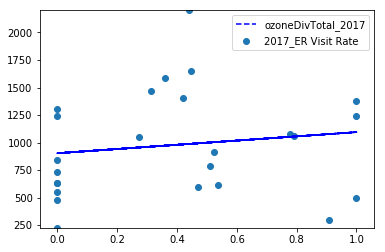

In [46]:
plt.scatter(gaAQIAndAsthmaER['ozoneDivTotal_2017'],gaAQIAndAsthmaER['2017_ER Visit Rate']) 
plt.ylim(gaAQIAndAsthmaER['2017_ER Visit Rate'].min(),gaAQIAndAsthmaER['2017_ER Visit Rate'].max())

(slope, intercept, p, r, _) = linregress(gaAQIAndAsthmaER['ozoneDivTotal_2017'], gaAQIAndAsthmaER['2017_ER Visit Rate'])
fit = slope * gaAQIAndAsthmaER['ozoneDivTotal_2017'] + intercept
plt.plot(gaAQIAndAsthmaER['ozoneDivTotal_2017'], fit,'b--')
plt.legend()

In [47]:
slope, p, r

(191.45703870588167, 0.1450522613020318, 0.489060949505711)

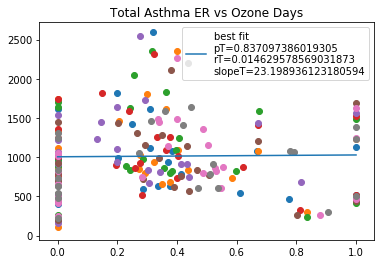

In [74]:
allOzoneData=[]
allERVisit=[]
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'],gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])
    allOzoneData.extend(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'])
    allERVisit.extend(gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])
plt.title('Total Asthma ER vs Ozone Days')

mT,bT,rT,pT,_=stats.linregress(allOzoneData, allERVisit)
    
#     #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
xmax, xmin=max(allOzoneData), min(allOzoneData)
# plt.xlabel('Ozone Days/Total Days')
#plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
plt.plot([xmin,xmax],[mT*xmin+bT,mT*xmax+bT])
plt.legend([f'best fit\npT={pT}\nrT={rT}\nslopeT={mT}'])
# plt.ylabel('ER Asthma Rate')
plt.savefig(f'../Images/totalsChildrenOzoneDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')

In [64]:
allERVisit

[0      987.5
 1     1424.6
 2      627.3
 3     1338.5
 4     1083.3
 5      937.6
 6      511.7
 7      597.7
 8     1816.4
 9     1613.4
 10    1128.5
 11     831.8
 12    1620.6
 13     540.5
 14     943.4
 15     398.3
 16     628.7
 17    1009.2
 18     981.7
 19     462.4
 20    1112.3
 21     782.5
 22    2594.4
 23    1080.6
 24     191.0
 Name: 2010_ER Visit Rate, dtype: float64, 0     1022.7
 1     1461.3
 2      837.0
 3     1340.1
 4     1093.9
 5      249.6
 6      509.6
 7      663.2
 8     1810.1
 9     1742.0
 10    1229.8
 11     894.3
 12    1617.2
 13     732.0
 14     942.8
 15     452.5
 16     680.1
 17     858.4
 18    1117.9
 19     297.4
 20     854.7
 21     801.3
 22    2349.2
 23    1074.6
 24     107.8
 Name: 2011_ER Visit Rate, dtype: float64, 0      977.0
 1     1623.7
 2      825.4
 3     1643.7
 4     1239.8
 5      907.3
 6      419.6
 7      881.9
 8     2044.7
 9     1701.5
 10    1485.6
 11    1002.4
 12    1837.2
 13     828.3
 14    1090.9
 15   

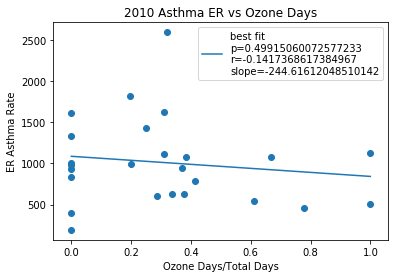

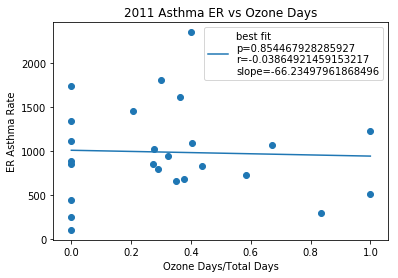

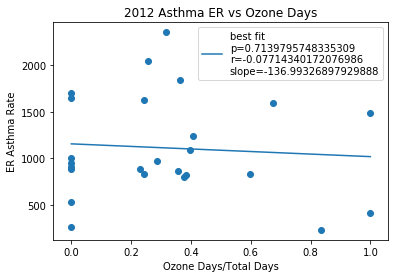

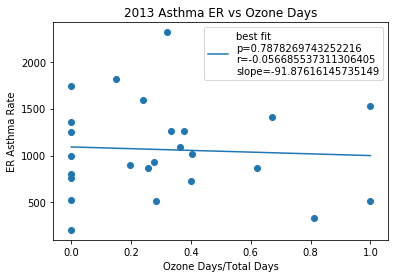

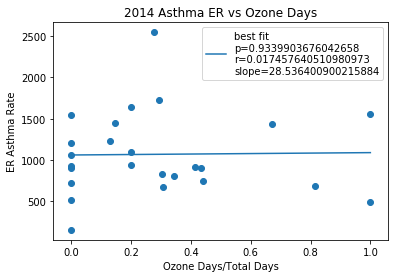

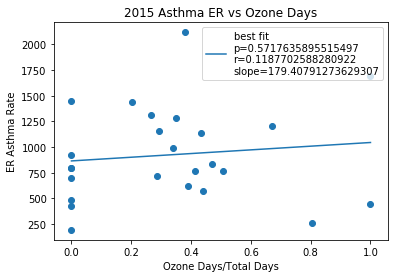

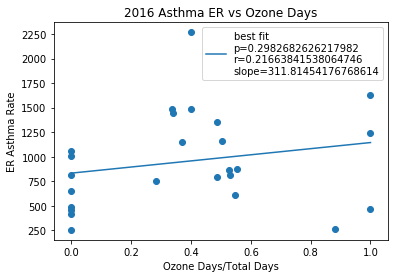

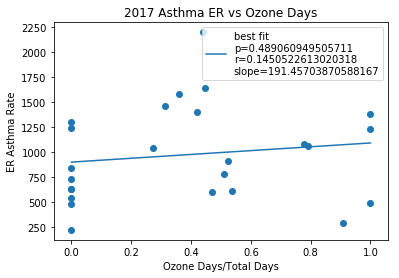

In [59]:
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'],gaAQIAndAsthmaER[f'{year}_ER Visit Rate'], )
    plt.title(f'{year} Asthma ER vs Ozone Days')
    m,b,r,p,_=stats.linregress(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])
    
    #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
    xmax, xmin=gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'].max(), gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'].min()
    plt.xlabel('Ozone Days/Total Days')
#     plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
    plt.plot([xmin,xmax],[m*xmin+b,m*xmax+b])
    plt.legend([f'best fit\np={p}\nr={r}\nslope={m}'])
    plt.ylabel('ER Asthma Rate')
    plt.savefig(f'../Images/childrenOzoneDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')
    plt.show()
    

In [ ]:
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'],gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])